# Analyze the usage.csv in this folder

In [1]:
import csv
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## data description

usage_cpu_e3_t25_main.csv: CPU only transforms

usage_e3_t25_gpu_transforms.csv: GPU transforms but with transfer to the CPU

Missing:
1) Experiment with CPU only transform but resetting the CUDA cache on every iteration -> Learn how deep the memory sinks in between iterations
2) Experiment with GPU but let it run for a full epoch und see if that works
3) Save amount of tensors in the csv file and see if they permanently increase..


In [2]:
df = pd.read_csv('data/usage_e3_t25_gpu_transforms.csv')

In [3]:
print(df.describe())

       device  context  utilization  total memory (MB)  free memory (MB)  \
count  3566.0      0.0  3566.000000             3566.0       3566.000000   
mean      1.0      NaN    67.475322            49140.0      18098.911385   
std       0.0      NaN    40.714286                0.0       9241.982507   
min       1.0      NaN     0.000000            49140.0        806.000000   
25%       1.0      NaN    24.000000            49140.0      11488.000000   
50%       1.0      NaN    98.000000            49140.0      17112.000000   
75%       1.0      NaN   100.000000            49140.0      22808.000000   
max       1.0      NaN   100.000000            49140.0      48176.000000   

       used memory (MB)  Memory not used by torch (MB)  
count       3566.000000                    3566.000000  
mean       31041.088615                     455.486259  
std         9241.982507                      29.037447  
min          964.000000                     455.000000  
25%        26332.000000       

In [4]:
df["time"] = pd.to_datetime(df["time"])

array([<Axes: >], dtype=object)

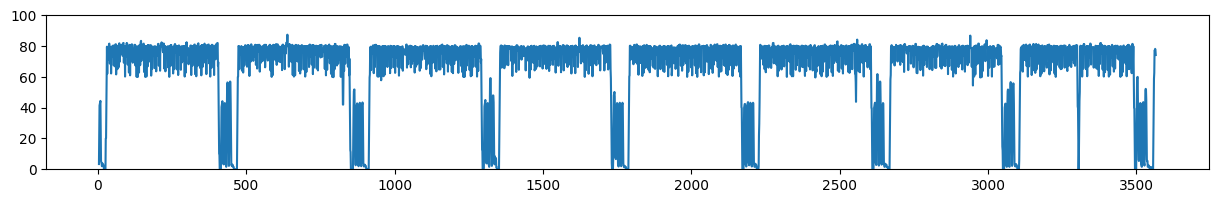

In [12]:
util = df.loc[:,"utilization"].rolling(5).sum()  / 5
util.plot(subplots=True, figsize=(15,2),ylim=(0,100))

In [11]:
# df.loc[:,"free memory (MB)":'Memory not used by torch (MB)'].plot(
#     subplots=True, 
#     figsize=(15,10), 
#     ylim=(0,df.loc[:,"total memory (MB)"][0]))


In [7]:
# pd.DataFrame.plot(df.loc[:,"free memory (MB)":'Memory not used by torch (MB)'], subplots=True, 
#                 figsize=(15,10), 
#                 ylim=(0,df.loc[:,"total memory (MB)"][0]))

In [8]:
df["used memory moving average"] = df.loc[:,"used memory (MB)"].rolling(100).sum()  / 100

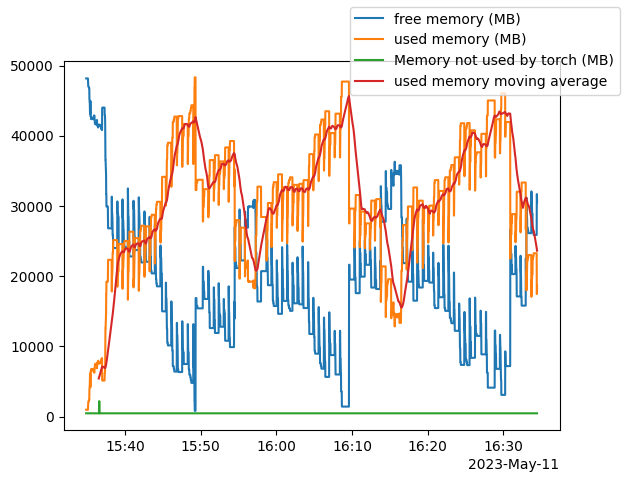

In [9]:
plot, ax = plt.subplots()
for i in ("free memory (MB)", "used memory (MB)", "Memory not used by torch (MB)", "used memory moving average"):
    ax.plot(df['time'], df.loc[:, i], label=i)
    
plot.legend()

cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf)

In [10]:
df.columns
df
# df.loc[:," total memory (MB)"][0]
# df.loc[:," Memory not used by torch (MB)"][10]

,device,context,time,utilization,total memory (MB),free memory (MB),used memory (MB),Memory not used by torch (MB),used memory moving average
0,1,NaN,2023-05-11 15:34:52,8,49140,48176,964,455,NaN
1,1,NaN,2023-05-11 15:34:53,2,49140,48176,964,455,NaN
2,1,NaN,2023-05-11 15:34:54,2,49140,48176,964,455,NaN
3,1,NaN,2023-05-11 15:34:55,3,49140,48176,964,455,NaN
4,1,NaN,2023-05-11 15:34:56,2,49140,48176,964,455,NaN
...,...,...,...,...,...,...,...,...,...
3561,1,NaN,2023-05-11 16:34:22,73,49140,25876,23264,455,24193.04
3562,1,NaN,2023-05-11 16:34:23,99,49140,25876,23264,455,24092.26
3563,1,NaN,2023-05-11 16:34:24,100,49140,31688,17452,455,23933.36
3564,1,NaN,2023-05-11 16:34:25,95,49140,31688,17452,455,23774.46
